In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from helper import run_experiment

# Machine Learning Engineer Nanodegree

### Reinforcement Learning

## Project 4: Train a Smartcab to Drive

### Question 1

Run this agent within the simulation environment with enforce_deadline set to False (see run function in agent.py), and observe how it performs. In this mode, the agent is given unlimited time to reach the destination. The current state, action taken by your agent and reward/penalty earned are shown in the simulator.

In your report, mention what you see in the agent’s behavior. Does it eventually make it to the target location?

**Answer:**

> As the agent randomly selects an action the agents behavior is completely random. As the agent has unlimited time to reach the destination, it eventually does. The time it takes to reach the destination depends on how lucky the agent is. Below i have attached the number of moves used by the agent to reach the target location over 10 runs.

> Below you can see the number of updates required to reach the goal state for 10 runs:

>1. 55 updates
>2. 24 updates
>3. 363 updates
>4. 149 updates
>5. 16 update
>6. 75 updates
>7. 98 updates
>8. 115 updates
>9. 20 updates
>10. 15 updates

>Turning on the enforced deadline we can see how the agent performs using random selection and use this as a benchmark for our later experiments. Below i have visualized the agents successrate at reaching the target location before the deadline, the total reward per trial and the number of negative reward actions taken per trial. The total reward depends on the distance between the agent and target location for each run, which causes it to flactuate and not give a very good indication of the agents performance.

Average success rate 29.000 %


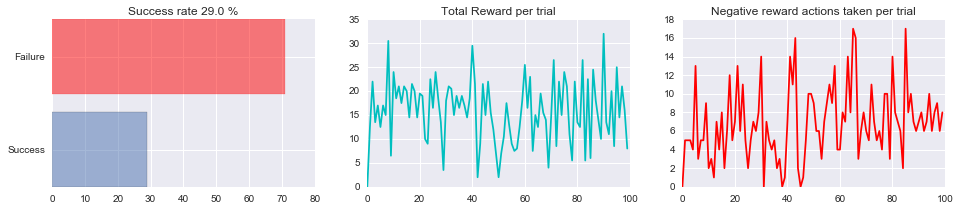

In [4]:
# Set plot size
fig = plt.figure(figsize=(16, 3))

# Run an experiment with random action selection
run_experiment(alpha=0.0, epsilon=0.0, gamma=0.0, selection="random", n_runs=1, trials=100)

### Question 2

Identify a set of states that you think are appropriate for modeling the driving agent. The main source of state variables are current inputs, but not all of them may be worth representing. Also, you can choose to explicitly define states, or use some combination (vector) of inputs as an implicit state.

Justify why you picked these set of states, and how they model the agent and its environment.

**Answer:**

>Based on the traffic rules it makes sense to keep track of the state of the traffic light, oncoming traffic as the agent should be aware of these to avoid making traffic violates and crash into oncoming traffic. On a red light the agent can turn right as long as there is no oncoming traffic turning left or traffic from the left going straight, we should therefore also inform the agent about traffic from the left. Due to the circulation rules information about traffic coming from the right can safely be ignored. We would factor in the time, however this could cause the smartcab to take some extra risk and learn some unwanted behavior such as traffic rule infringements in order to make it to the target on time. It would also be beneficial to inform the agent about which direction the planner want it to go.

>The state **s** is represented using **traffic light**, **oncoming**, **left**, **next waypoint**.

### Question 3

Implement the Q-Learning algorithm by initializing and updating a table/mapping of Q-values at each time step. Now, instead of randomly selecting an action, pick the best action available from the current state based on Q-values, and return that.

What changes do you notice in the agent’s behavior?

**Answer:**

> My initial simply Q-learning algorithm i have chosen to implement a ε-greedy action selection method which selects a random action with probability ε. 
>From the PyGame interface we can see that Q-learning algorithm gives the agent a better understanding of the world. The agent fairly quickly learns the traffic rules to a certain degree and you can clearly see that the agent is navigating towards the target and it makes it to the target within the dealine with some luck in the later trials. However, the agent is sometimes unable to learn to successfully turn left, making it converge on a policy that does not allow it to reach the target for the trials requiring a left turn. The high epsilon value required to let the agent explore sufficiently to learn a reasonable value for all state action pairs makes the agent perform to many detours caused by random actions 

>Let's run the agent 3 times using 100 trials and study the results.

Average success rate 53.333 %


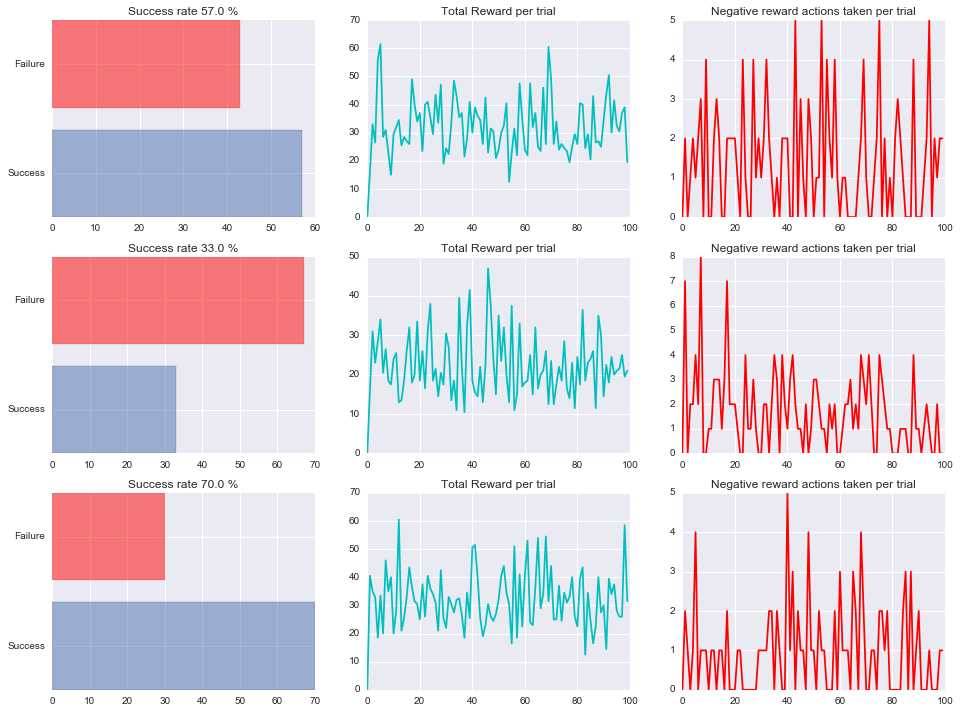

In [5]:
fig = plt.figure(figsize=(16, 4*3))

run_experiment(alpha=0.15, epsilon=0.2, gamma=0.8, selection="epsilon-greedy", n_runs=3, trials=100)

> We can see that the agents average successrate for all the 100 trials in the 3 simulations is 55.33%, which means there is still a lot more room for improvement. The main reason it does not achieve a higher score is that the agent sometimes end up learning a policy where it is unable to perform certain actions. The high chance of doing a random move also causes the agent to perform a lot of negative reward actions and take detours, which further deter it's improvement.

### Question 4 

Enhance the driving agent

Apply the reinforcement learning techniques you have learnt, and tweak the parameters (e.g. learning rate, discount factor, action selection method, etc.), to improve the performance of your agent. Your goal is to get it to a point so that within 100 trials, the agent is able to learn a feasible policy - i.e. reach the destination within the allotted time, with net reward remaining positive.

Report what changes you made to your basic implementation of Q-Learning to achieve the final version of the agent. How well does it perform?

**Answer:**

>**Action Selection Method**

>There are multiple action selection policies worth mentioning. Boltzmann, ε-greedy and greedy selection. In many simple cases a ε-greedy machanism can be chosen where the ε value can be kept fixed for all number of iterations. Usually, the amount exploration done by the agent should diminish over time, meaning that the policy should get increasingly greedy. This can be achieved making ε approach 0 as the number of trials t increase. A simple form of this could by ε = 1/t. The Boltzmann policy is "softmax" method that uses the Gibbs distribution to estimate the probability of taking an action "a" in a given state "s". In the greedy policy, the agent selects the most interesting actions (as an evaluation function) in a given state. In this case, the agent does not explore all actions.

>I think an increasingly greedy policy is the best fit in this case. As the agent needs to learn a fairly large amount of state, action pair values it makes sense to let the agent explore a lot in the beginning before making it more greedy once it has a more complete view of the world. Having a low exploration rate towards the end will also stop the agent from taking any negative reward actions. I have implemented an *epsilon-decay* function.

>** ε-decay**

>Let's visualize how the the ε value will change over time using an exponential decay function $N(t) = N_0e^{- \Lambda t}$

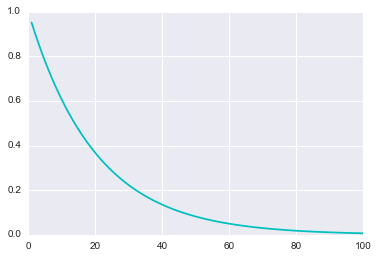

In [9]:
t = np.linspace(1, 100, 100); e = np.exp(-0.05*t)

plt.plot(t, e, 'c');

> Testing the ε-decay action selection function we get the following results

Average success rate 82.000 %


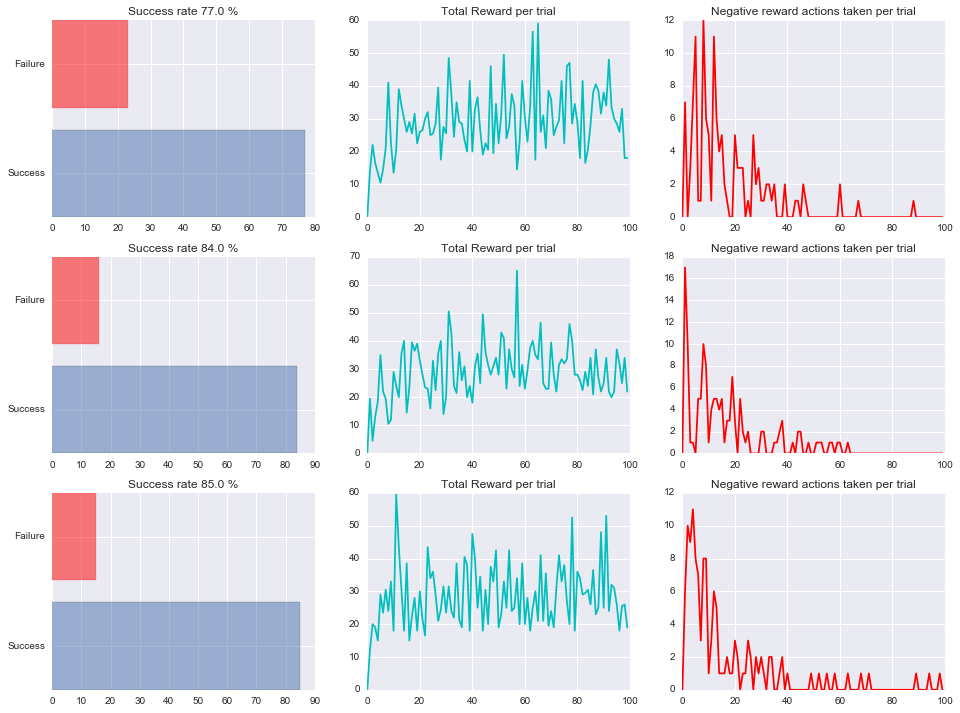

In [5]:
fig = plt.figure(figsize=(16, 4*3))

run_experiment(alpha=0.1, epsilon=0.05, gamma=0.8, selection="epsilon-decay", n_runs=3, trials=100)

> Which is a huge improvement over our ε-greedy action selection results!

>** Action filtering **

>As it does not make sense for the agent to move to do any other moves than staying put in case of a red light or moving to the next waypoint one could implement an action filter that removes any illogical moves. This also has the advantage of limiting the number of state, action pairs the agent would have to learn. This will have the added advantage that the agent should be able to learn the optimal policy in fewer iterations and reduce the amount of exploration the agent would need to do.

Average success rate 98.667 %


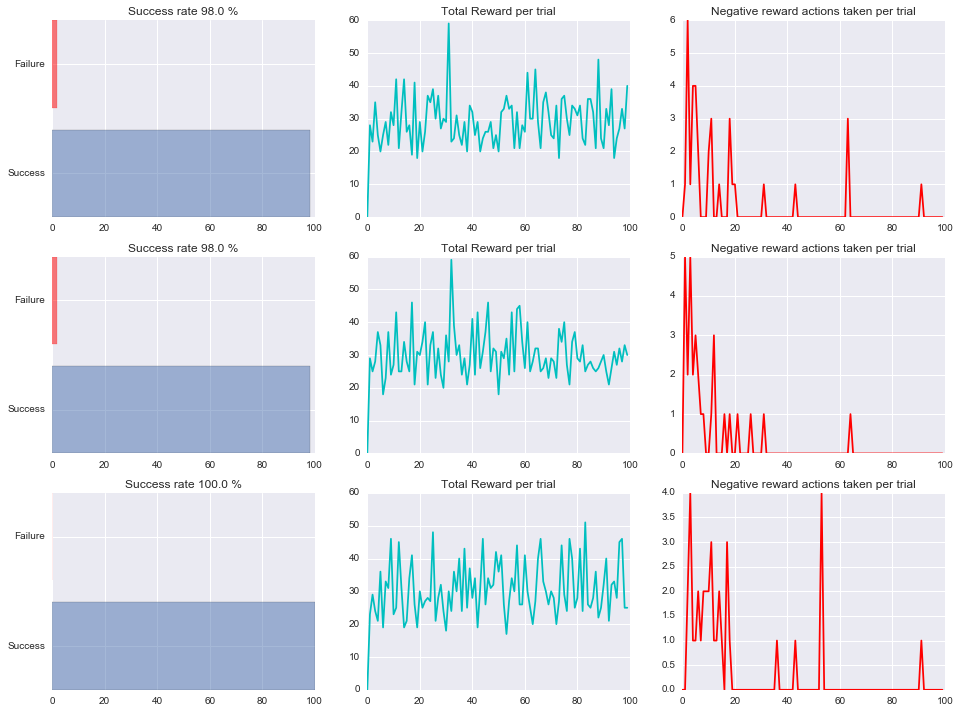

In [3]:
fig = plt.figure(figsize=(16, 4*3))

run_experiment(alpha=0.1, epsilon=0.1, gamma=0.8, selection="epsilon-decay", n_runs=3, trials=100, f=True)

>**Parameter Tuning**

> Crucial to successful reinforcement learning is the careful setting of the three meta-parameters α; β and γ. There are multiple ways to go about tuning the parameters. However, due to the long running time of the simulation (which can be decreased by not displaying graphics) search algorithms such as evolutionary algorithms will take a long time to run. I have therefore chosen to select the optimal parameters through trial and error.

> Based on the last run (the numbers above) there was not too much of room for improvments, and the only adjustment that improved my results was to increase the γ value to 0.9, which gave the following results:

Average success rate 99.667 %


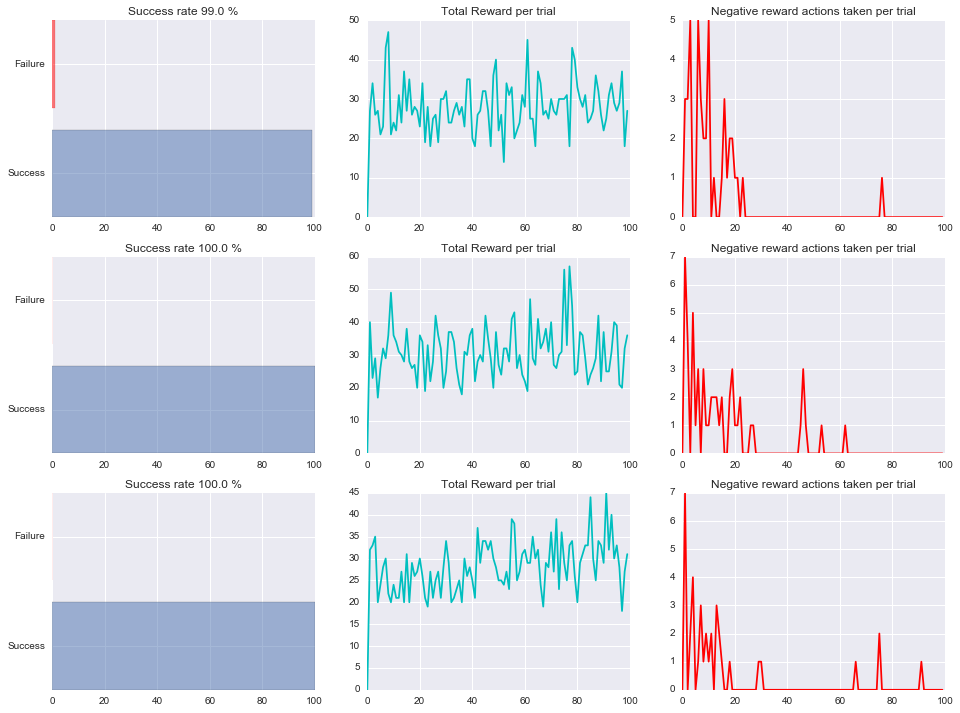

In [8]:
fig = plt.figure(figsize=(16, 4*3))

run_experiment(alpha=0.1, epsilon=0.1, gamma=0.9, selection="epsilon-decay", n_runs=3, trials=100, f=True) 

### Question 5

Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties?

**Answer:**

> The optimal policy is simply: Given that the agent is not in violation of any traffic rules, move to the next waypoint. The traffic violates are discussed in greater detail in **Question 2**

> My agent seems to learn fairly quickly and does not use many iterations before clearly acting intelligently following a close to optimal policy and consistently making it to the target on time. The agent does incur some penalities, but this is only in the cases where a random action selection kicks in on a red light. Reducing the number of state, action pairs through action filtering seemed to solve some of the problems associated with some of the less common state, action pairs.